# Implement with R

## The Chemical Catalyst Experiment

This experiment aims to give a sense of a **$2^2$ design**.

Consider an investigation into the effect of the concentration of the reactant and the amount of the catalyst on the conversion (yield) in a chemical process. 

The objective of the experiment was to determine if adjustments to either of these `2` variables would increase the yield. 

Let the reactant concentration be variable **A** and assume the `2`-levels of interest be `15` and `25`%. 

The catalyst is variable **B**, with the high-level denoting the use of `2` pounds of the catalyst and the low-level denoting the use of only `1` pound. 

The experiment is replicated `3` times, so there are `12` runs (`3 * 2^2`). The order in which the runs are made is random, so this is a completely randomised experiment.

Firstly, import the dataset

In [94]:
dataset <- read.csv('chem.csv')

Display the table to get a sense of the data

In [2]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [117]:
dataset_tbl <- dataset %>% group_by(A, B) %>% summarise(Yields=paste0(Y, collapse=" , "), Total=sum(Y)) %>% arrange(desc(A), desc(B))
dataset_tbl$Var <- c("1", "b", "a", "ab")
dataset_tbl

ERROR: Error: Must group by variables found in `.data`.
* Column `A` is not found.
* Column `B` is not found.


From above, the effects are as follows,

In [74]:
effects <- data.frame(Effect=c("A", "B", "AB"),
                      Trt.1 =c( -1,  -1,    1),
                      Trt.a =c(  1,  -1,   -1),
                      Trt.b =c( -1,   1,   -1),
                      Trt.ab=c(  1,   1,    1))

effects$Avg.Total <- (1/(2^(2-1) * 3)) * ((dataset_tbl %>% filter(Var == "1"))$Total * effects$Trt.1 + 
                                          (dataset_tbl %>% filter(Var == "a"))$Total * effects$Trt.a + 
                                          (dataset_tbl %>% filter(Var == "b"))$Total * effects$Trt.b + 
                                          (dataset_tbl %>% filter(Var == "ab"))$Total * effects$Trt.ab)
effects

Effect,Trt.1,Trt.a,Trt.b,Trt.ab,Avg.Total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,-1,1,-1,1,8.333333
B,-1,-1,1,1,-5.000000
AB,1,-1,-1,1,1.666667


Visualize the clustering,

In [64]:
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/4.1/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘colorspace’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘gtable’, ‘isoband’, ‘scales’, ‘withr’




In [65]:
library(ggplot2)

In [77]:
displayEffectsGraph <- function (effects) {
    effects.sd <- sd(effects$Avg.Total)
    effects.mean <- mean(effects$Avg.Total) 

    effects.prob <- data.frame(labels=effects$Effect, avg=effects$Avg.Total)
    effects.prob$zscore <- (effects$Avg.Total - effects.mean) / effects.sd
    effects.prob$prob <- pnorm(effects.prob$zscore, mean=0, sd=1, lower.tail=TRUE)

    ggplot(aes(x=avg, y=prob, label=labels), data=effects.prob) + 
        geom_point() + 
        geom_label() + 
        geom_smooth(method='lm', se=FALSE)
}

`geom_smooth()` using formula 'y ~ x'



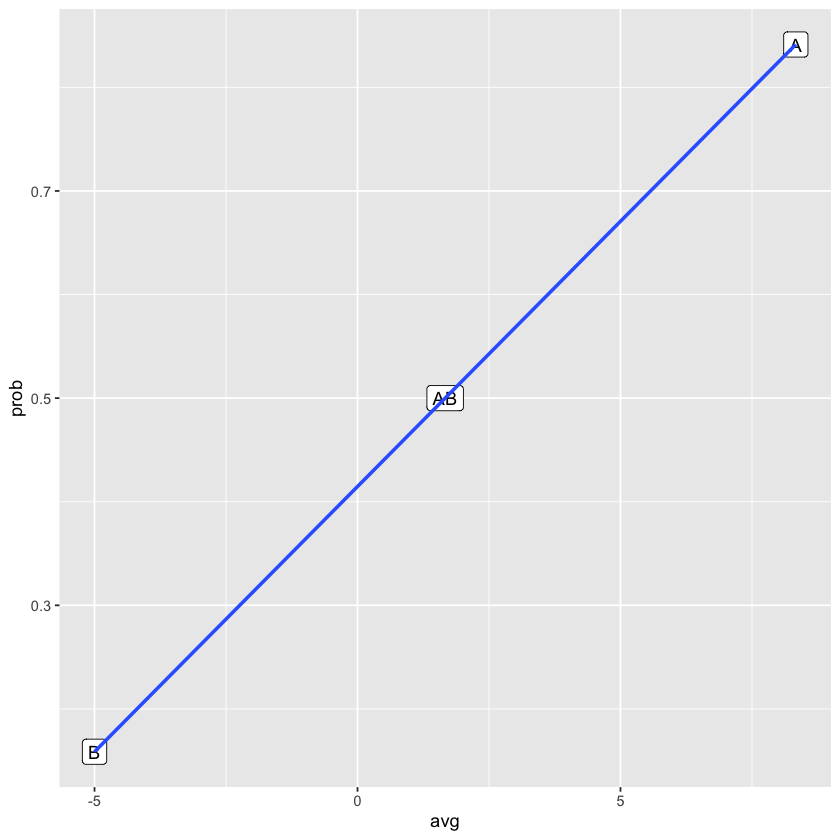

In [78]:
displayEffectsGraph(effects)

Notice that **A** and **B** is far from the center. Using these variables in ANOVA,

In [95]:
anova <- aov(Y ~ A + B, data=dataset)
summary(anova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1 208.33  208.33   47.27 7.27e-05 ***
B            1  75.00   75.00   17.02  0.00258 ** 
Residuals    9  39.67    4.41                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

We can see that the p-values is less than `0.05` (alpha level) showing significant evidence of affect of **A** and **B**.

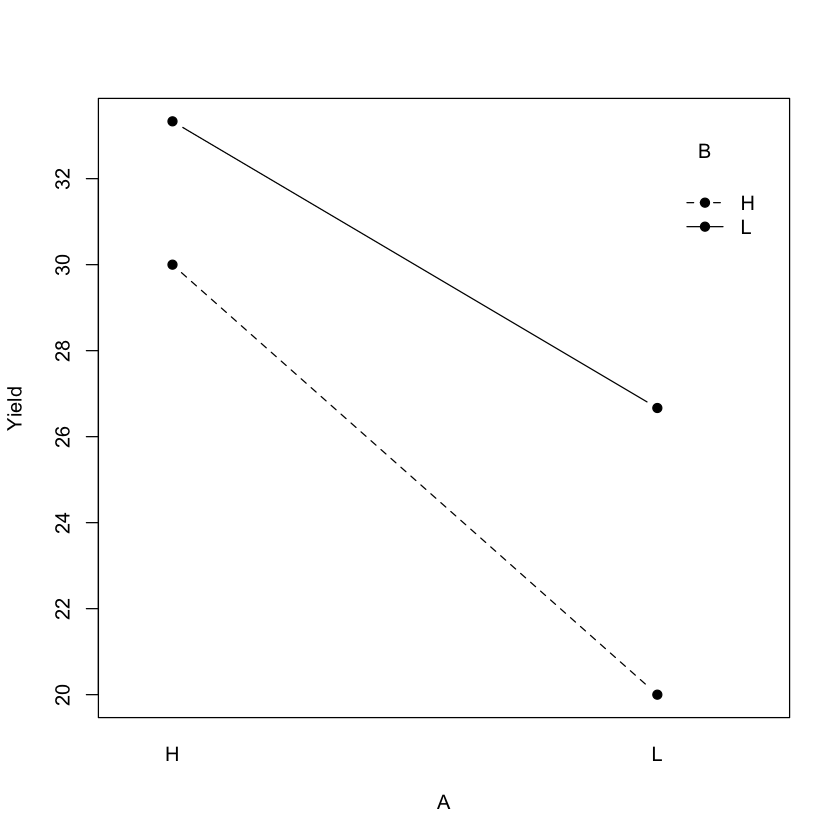

In [6]:
with(dataset, interaction.plot(A, B, Y, type="b", pch=19, fixed=T, xlab="A",ylab="Yield"))

## The Etch Rate Experiment

This experiment aims to give a sense of a **$2^3$ design**.

There are three variables, **A**, **B** and **C**.

Firstly, import the dataset,

In [1]:
dataset <- read.csv('etch.csv')

Display the table to get a sense of the data

In [80]:
dataset_tbl <- dataset %>% group_by(A, B, C) %>% summarise(Yields=paste0(Y, collapse=" , "), Total=sum(Y)) %>% arrange(desc(A), desc(B), desc(C))
dataset_tbl$Var <- c("1", "c", "b", "bc", "a", "ac", "ab", "abc")
dataset_tbl

`summarise()` has grouped output by 'A', 'B'. You can override using the `.groups` argument.



A,B,C,Yields,Total,Var
<chr>,<chr>,<chr>,<chr>,<int>,<chr>
L,L,L,"550 , 604",1154,1
L,L,H,"1037 , 1052",2089,c
L,H,L,"633 , 601",1234,b
L,H,H,"1075 , 1063",2138,bc
H,L,L,"669 , 650",1319,a
H,L,H,"749 , 868",1617,ac
H,H,L,"642 , 635",1277,ab
H,H,H,"729 , 860",1589,abc


From above, the effects are as follows,

In [81]:
effects <- data.frame(Effect =c("A", "B", "C", "AB", "AC", "BC", "ABC"),
                      Trt.1  =c( -1,  -1,  -1,    1,    1,    1,    -1),
                      Trt.a  =c(  1,  -1,  -1,   -1,   -1,    1,     1),
                      Trt.b  =c( -1,   1,  -1,   -1,    1,   -1,     1),
                      Trt.c  =c( -1,  -1,   1,    1,   -1,   -1,     1),
                      Trt.ab =c(  1,   1,  -1,    1,   -1,   -1,    -1),
                      Trt.ac =c(  1,  -1,   1,   -1,    1,   -1,    -1),
                      Trt.bc =c( -1,   1,   1,   -1,   -1,    1,    -1),
                      Trt.abc=c(  1,   1,   1,    1,    1,    1,     1))

effects$Avg.Total <- (1/(2^(3 - 1) * 2)) * ((dataset_tbl %>% filter(Var == "1"))$Total * effects$Trt.1 + 
                                            (dataset_tbl %>% filter(Var == "c"))$Total * effects$Trt.c + 
                                            (dataset_tbl %>% filter(Var == "b"))$Total * effects$Trt.b + 
                                            (dataset_tbl %>% filter(Var == "bc"))$Total * effects$Trt.bc + 
                                            (dataset_tbl %>% filter(Var == "a"))$Total * effects$Trt.a + 
                                            (dataset_tbl %>% filter(Var == "ac"))$Total * effects$Trt.ac + 
                                            (dataset_tbl %>% filter(Var == "ab"))$Total * effects$Trt.ab + 
                                            (dataset_tbl %>% filter(Var == "abc"))$Total * effects$Trt.abc)
effects

Effect,Trt.1,Trt.a,Trt.b,Trt.c,Trt.ab,Trt.ac,Trt.bc,Trt.abc,Avg.Total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,-1,1,-1,-1,1,1,-1,1,-101.625
B,-1,-1,1,-1,1,-1,1,1,7.375
C,-1,-1,-1,1,-1,1,1,1,306.125
AB,1,-1,-1,1,1,-1,-1,1,-24.875
AC,1,-1,1,-1,-1,1,-1,1,-153.625
BC,1,1,-1,-1,-1,-1,1,1,-2.125
ABC,-1,1,1,1,-1,-1,-1,1,5.625


Visualize the clustering,

`geom_smooth()` using formula 'y ~ x'



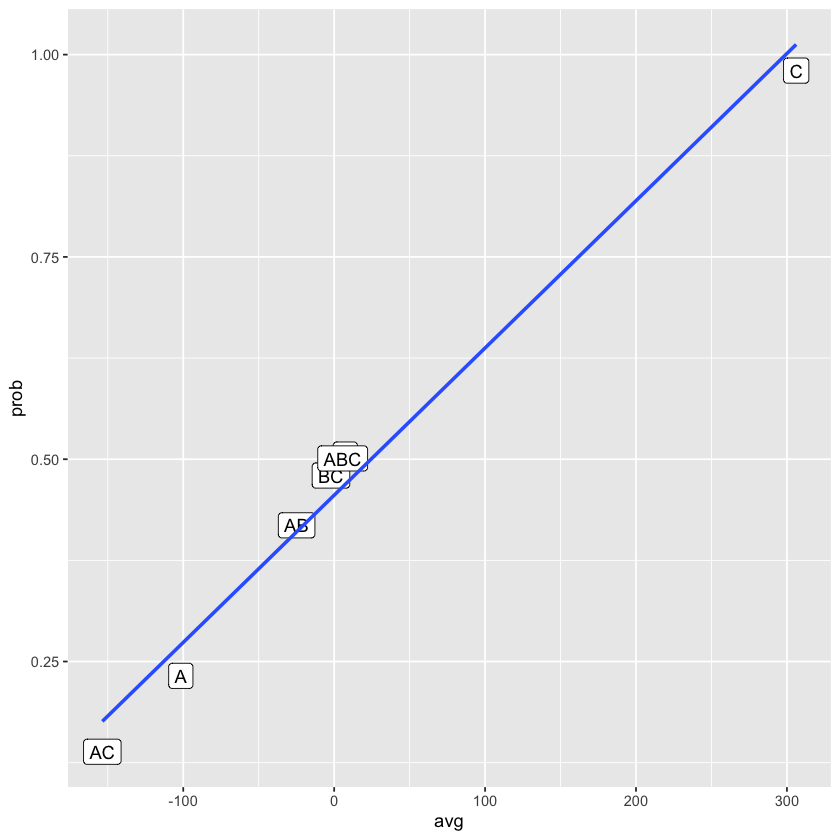

In [82]:
displayEffectsGraph(effects)

Notice that **A**, **AC** and **C** is far from the center. Using these variables in ANOVA,

In [2]:
anova <- aov(Y ~ A * B * C, data=dataset)
summary(anova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1  41311   41311  18.339 0.002679 ** 
B            1    218     218   0.097 0.763911    
C            1 374850  374850 166.411 1.23e-06 ***
A:B          1   2475    2475   1.099 0.325168    
A:C          1  94403   94403  41.909 0.000193 ***
B:C          1     18      18   0.008 0.930849    
A:B:C        1    127     127   0.056 0.818586    
Residuals    8  18020    2253                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

We can see that the p-values is less than `0.05` (alpha level) showing significant evidence of affect of **A** and **C** and their interaction.

Question: Why is it AB showing non-parallelism when ANOVA result shows it is insignificant?

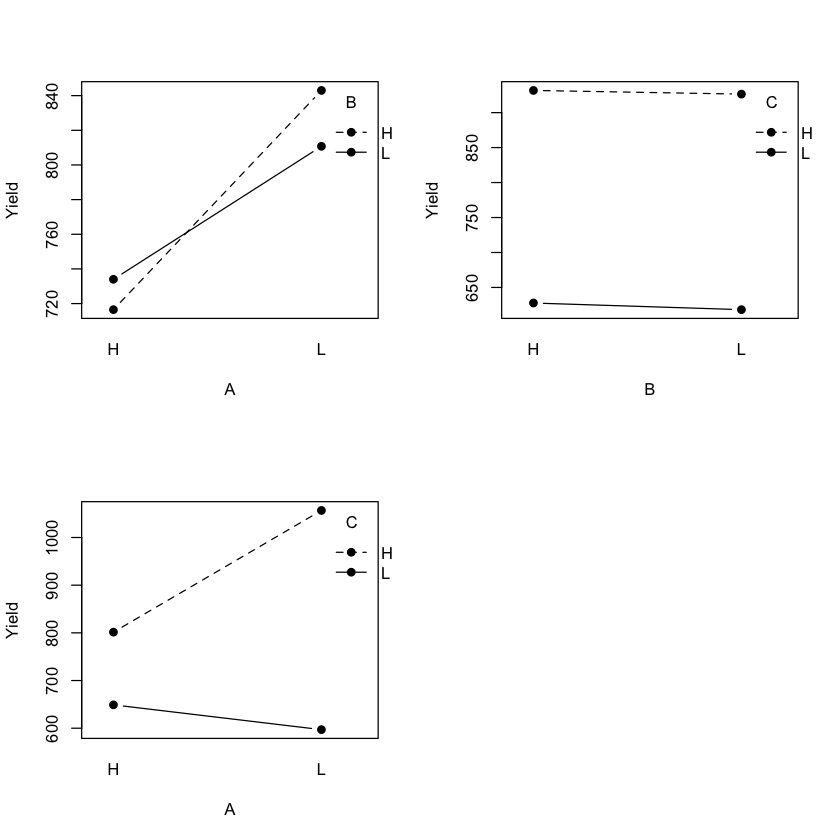

In [90]:
par(mfrow=c(2,2))
with(dataset, interaction.plot(A, B, Y, type="b", pch=19, fixed=T, xlab="A",ylab="Yield"))
with(dataset, interaction.plot(B, C, Y, type="b", pch=19, fixed=T, xlab="B",ylab="Yield"))
with(dataset, interaction.plot(A, C, Y, type="b", pch=19, fixed=T, xlab="A",ylab="Yield"))

The is evidence that variables **A** and **C** significantly affects the yield, but no evidence to suggest that **B** does.

There is no significant evidence that indicates that there are any interactions between **A** and **B**, **B** and **C** and **A**, **B** and **C**, but there is significant evidence that indicates interactions between **A** and **C**.

## The Filtration Rate Experiment

This experiment aims to give a sense of a **$2^4$ design**.

Suppose a chemical product is produced in a pressure vessel. A factorial experiment is carried out in the pilot plant to study the variables that may influence the filtration rate of this product. The four variables are temperature (**A**), pressure (**B**), concentration of formaldehyde (**C**), and stirring rate (**D**). Each variable is present at `2`-levels. 

The `16` runs are made in random order. The engineer is interested in maximising the filtration rate. Current process conditions give filtration rates of around `75`gal/h. The process also currently uses the concentration of formaldehyde, variable **C**, at the high level.

The engineer would like to reduce the formaldehyde concentration as much as possible but has been unable to do so because it always results in lower filtration rates.

Firstly, import the dataset,

In [99]:
dataset <- read.csv('filtration.csv')

Display the table to get a sense of the data

In [85]:
dataset_tbl <- dataset %>% arrange(desc(A), desc(B), desc(C), desc(D))
dataset_tbl$Var <- c("1", "d", "c", "cd", "b", "bd", "bc", "bcd", "a", "ad", "ac", "acd", "ab", "abd", "abc", "abcd")
dataset_tbl

A,B,C,D,Y,Var
<chr>,<chr>,<chr>,<chr>,<int>,<chr>
L,L,L,L,25,1
L,L,L,H,43,d
L,L,H,L,68,c
L,L,H,H,55,cd
L,H,L,L,48,b
L,H,L,H,25,bd
L,H,H,L,60,bc
L,H,H,H,70,bcd
H,L,L,L,71,a


In [86]:
effects <- data.frame(Effect=c("A", "B", "AB", "C", "AC", "BC", "ABC", "D", "AD", "BD", "ABD", "CD", "ACD", "BCD", "ABCD"),
                      Trt.1=c(-1,-1,1,-1,1,1,-1,-1,1,1,-1,1,-1,-1,1),
                      Trt.a=c(1,-1,-1,-1,-1,1,1,-1,-1,1,1,1,1,-1,-1),
                      Trt.b=c(-1,1,-1,-1,1,-1,1,-1,1,-1,1,1,-1,1,-1),
                      Trt.ab=c(1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1),
                      Trt.c=c(-1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,1,1,-1),
                      Trt.ac=c(1,-1,-1,1,1,-1,-1,-1,-1,1,1,-1,-1,1,1),
                      Trt.bc=c(-1,1,-1,1,-1,1,-1,-1,1,-1,1,-1,1,-1,1),
                      Trt.abc=c(1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1),
                      Trt.d=c(-1,-1,1,-1,1,1,-1,1,-1,-1,1,-1,1,1,-1),
                      Trt.ad=c(1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1),
                      Trt.bd=c(-1,1,-1,-1,1,-1,1,1,-1,1,-1,-1,1,-1,1),
                      Trt.abd=c(1,1,1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1),
                      Trt.cd=c(-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1),
                      Trt.acd=c(1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1),
                      Trt.bcd=c(-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1),
                      Trt.abcd=c(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1))

effects$Avg.Total <- (1/(2^(4 - 1) * 1)) * ((dataset_tbl %>% filter(Var == "1"))$Y * effects$Trt.1 + 
                                            (dataset_tbl %>% filter(Var == "d"))$Y * effects$Trt.d +
                                            (dataset_tbl %>% filter(Var == "c"))$Y * effects$Trt.c +
                                            (dataset_tbl %>% filter(Var == "cd"))$Y * effects$Trt.cd +
                                            (dataset_tbl %>% filter(Var == "b"))$Y * effects$Trt.b +
                                            (dataset_tbl %>% filter(Var == "bd"))$Y * effects$Trt.bd +
                                            (dataset_tbl %>% filter(Var == "bc"))$Y * effects$Trt.bc +
                                            (dataset_tbl %>% filter(Var == "bcd"))$Y * effects$Trt.bcd +
                                            (dataset_tbl %>% filter(Var == "a"))$Y * effects$Trt.a +
                                            (dataset_tbl %>% filter(Var == "ad"))$Y * effects$Trt.ad +
                                            (dataset_tbl %>% filter(Var == "ac"))$Y * effects$Trt.ac +
                                            (dataset_tbl %>% filter(Var == "acd"))$Y * effects$Trt.acd +
                                            (dataset_tbl %>% filter(Var == "ab"))$Y * effects$Trt.ab +
                                            (dataset_tbl %>% filter(Var == "abd"))$Y * effects$Trt.abd +
                                            (dataset_tbl %>% filter(Var == "abc"))$Y * effects$Trt.abc +
                                            (dataset_tbl %>% filter(Var == "abcd"))$Y * effects$Trt.abcd)
effects

Effect,Trt.1,Trt.a,Trt.b,Trt.ab,Trt.c,Trt.ac,Trt.bc,Trt.abc,Trt.d,Trt.ad,Trt.bd,Trt.abd,Trt.cd,Trt.acd,Trt.bcd,Trt.abcd,Avg.Total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,21.625
B,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,3.125
AB,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,0.125
C,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1,9.875
AC,1,-1,1,-1,-1,1,-1,1,1,-1,1,-1,-1,1,-1,1,-18.125
BC,1,1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,2.375
ABC,-1,1,1,-1,1,-1,-1,1,-1,1,1,-1,1,-1,-1,1,1.875
D,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,14.625
AD,1,-1,1,-1,1,-1,1,-1,-1,1,-1,1,-1,1,-1,1,16.625


Visualize the clustering,

`geom_smooth()` using formula 'y ~ x'



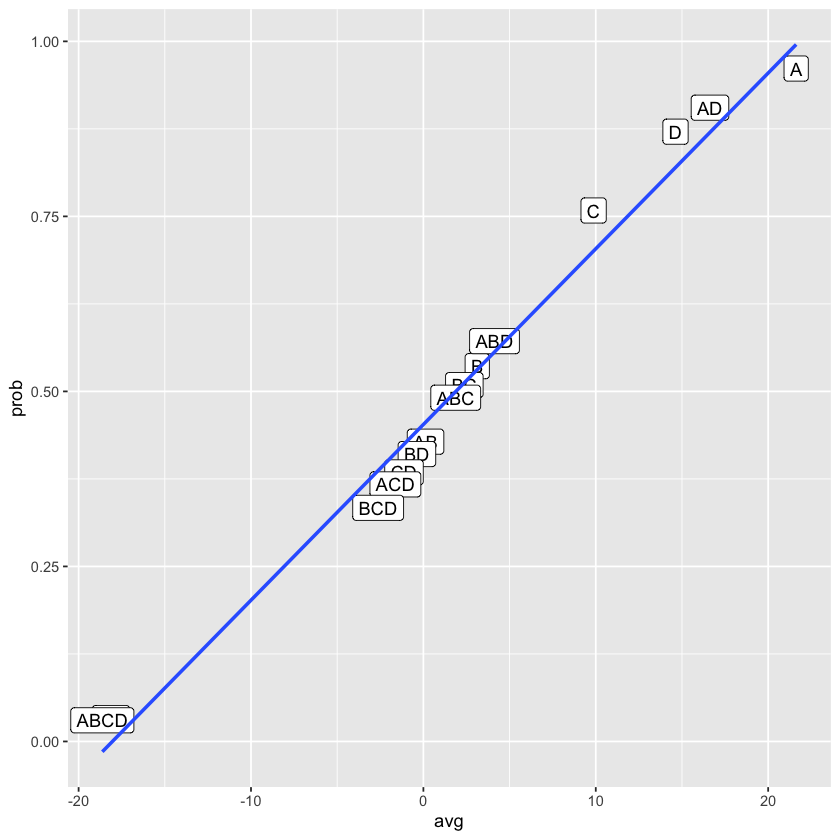

In [87]:
displayEffectsGraph(effects)

Notice that **A**, **C** and **D** is far from the center. Using ANOVA,

In [101]:
anova <- aov(Y ~ A * C * D, data=dataset)
summary(anova)

            Df Sum Sq Mean Sq F value Pr(>F)  
A            1 1870.6  1870.6   9.596 0.0147 *
C            1  390.1   390.1   2.001 0.1949  
D            1  855.6   855.6   4.389 0.0695 .
A:C          1 1314.1  1314.1   6.741 0.0318 *
A:D          1 1105.6  1105.6   5.671 0.0444 *
C:D          1    5.1     5.1   0.026 0.8760  
A:C:D        1   10.6    10.6   0.054 0.8218  
Residuals    8 1559.5   194.9                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

We can see that the p-values is less than `0.05` (alpha level) showing significant evidence of affect of **A**, and **AC** and **AD** interaction.

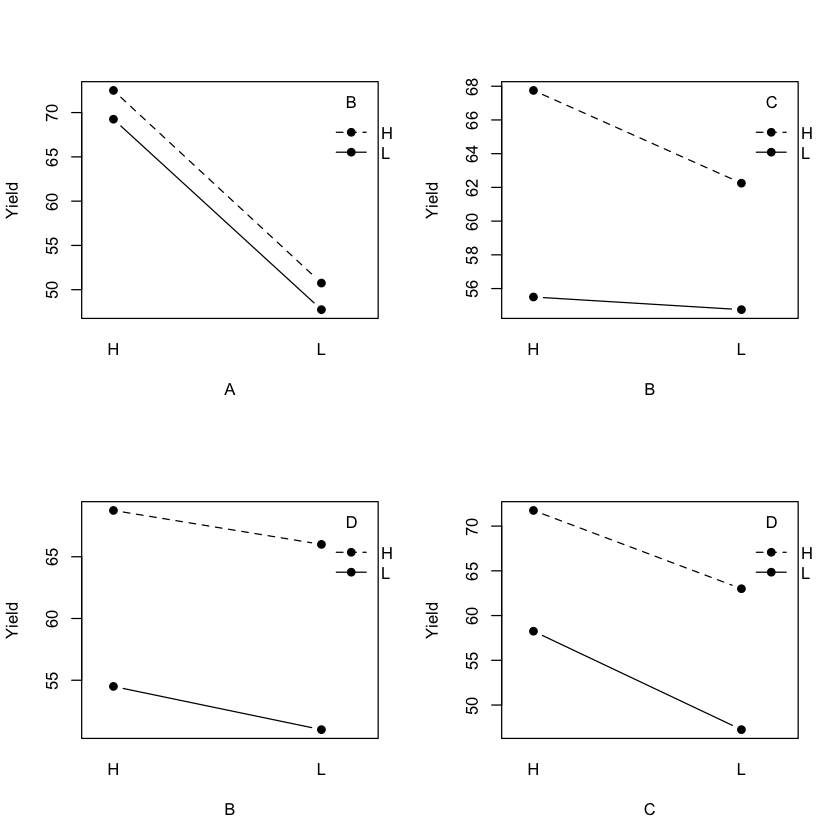

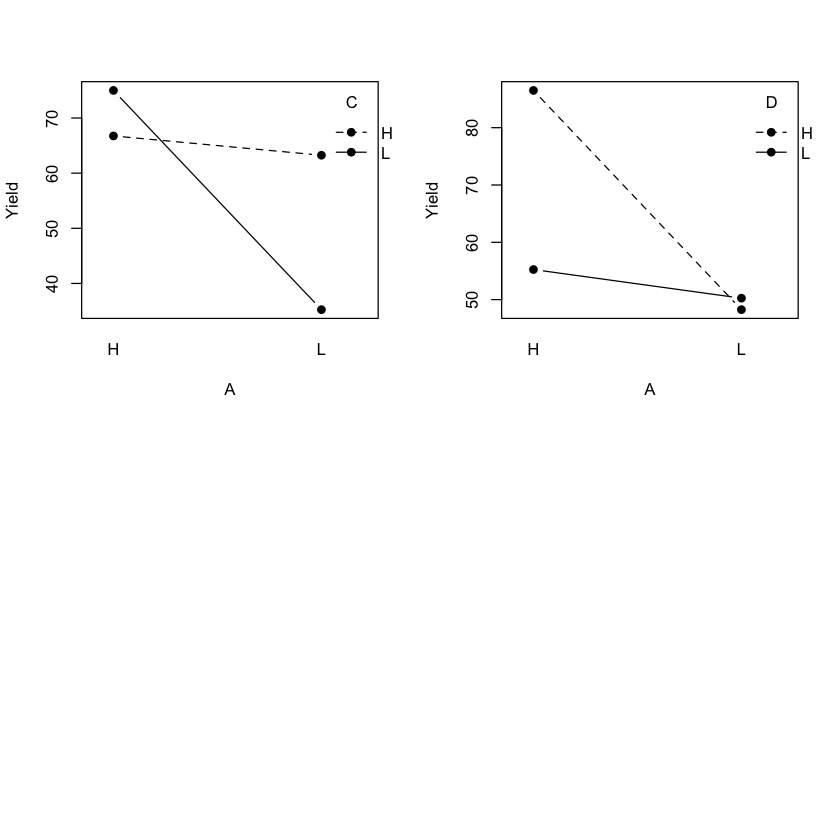

In [16]:
par(mfrow=c(2,2))
with(dataset, interaction.plot(A, B, Y, type="b", pch=19, fixed=T, xlab="A",ylab="Yield"))
with(dataset, interaction.plot(B, C, Y, type="b", pch=19, fixed=T, xlab="B",ylab="Yield"))
with(dataset, interaction.plot(B, D, Y, type="b", pch=19, fixed=T, xlab="B",ylab="Yield"))
with(dataset, interaction.plot(C, D, Y, type="b", pch=19, fixed=T, xlab="C",ylab="Yield"))
with(dataset, interaction.plot(A, C, Y, type="b", pch=19, fixed=T, xlab="A",ylab="Yield"))
with(dataset, interaction.plot(A, D, Y, type="b", pch=19, fixed=T, xlab="A",ylab="Yield"))

# Formative Questions

(Source: Chew Chee Hua. "Basic Statistical Methods in Experimental Design")

## Question 1

A router is used to cut locating notches on a printed circuit board. The vibration level at the surface of the board as it is cut is considered to be a major source of dimensional variation in the notches. Two variables are thought to influence vibration: bit size (**A**) and cutting speed (**B**). `2` bit sizes (`1/16` and `1/8` inch) and `2` speeds (`40` and `90`rpm) are selected, and four boards are cut at each set of conditions shown below. The response variable is vibration measured as a resultant vector of `3` accelerometers (`x`, `y`, and `z`) on each test circuit board.

Analyse the data from this experiment.


## Question 2

Construct a normal probability plot of the residuals, and plot the residuals versus the predicted vibration level. What is your conclusion?

## Question 3

Draw the **AB** interaction plot. Interpret this plot. What levels of bit size and speed would you recommend for routine operation?

In [113]:
dataset <- read.csv('vib.csv')
anova <- aov(Y ~ A * B, data=dataset)
summary(anova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1 1107.2  1107.2  185.25 1.17e-08 ***
B            1  227.3   227.3   38.02 4.83e-05 ***
A:B          1  303.6   303.6   50.80 1.20e-05 ***
Residuals   12   71.7     6.0                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

There is evidence that variables **A** and **B** significantly affects the vibration levels. There is also significant interaction between **A** and **B**.

hat values (leverages) are all = 0.25
 and there are no factor predictors; no plot no. 5



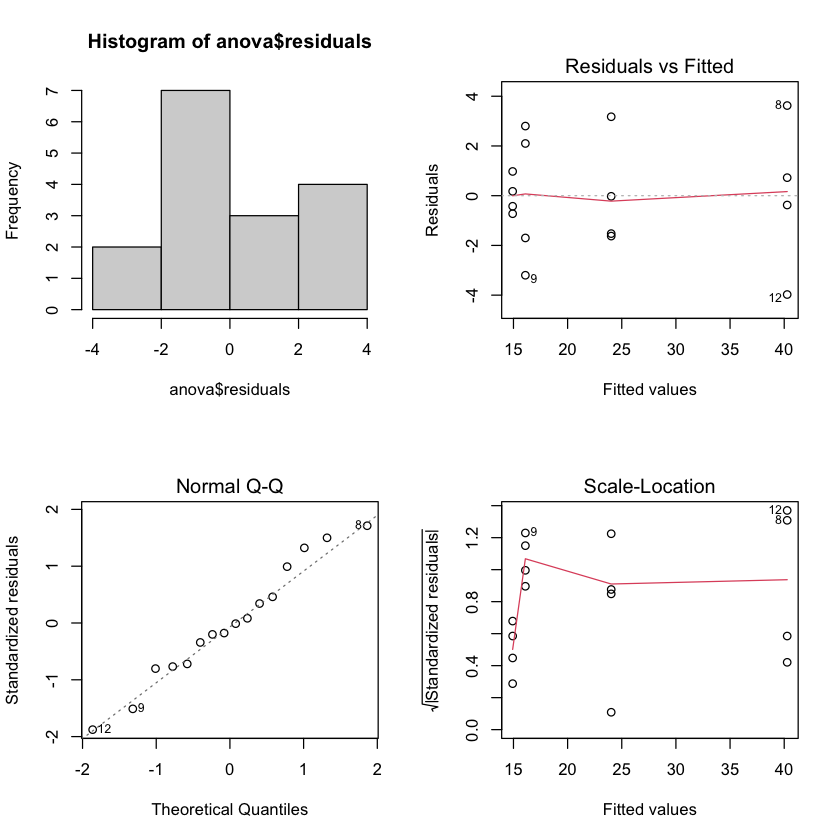

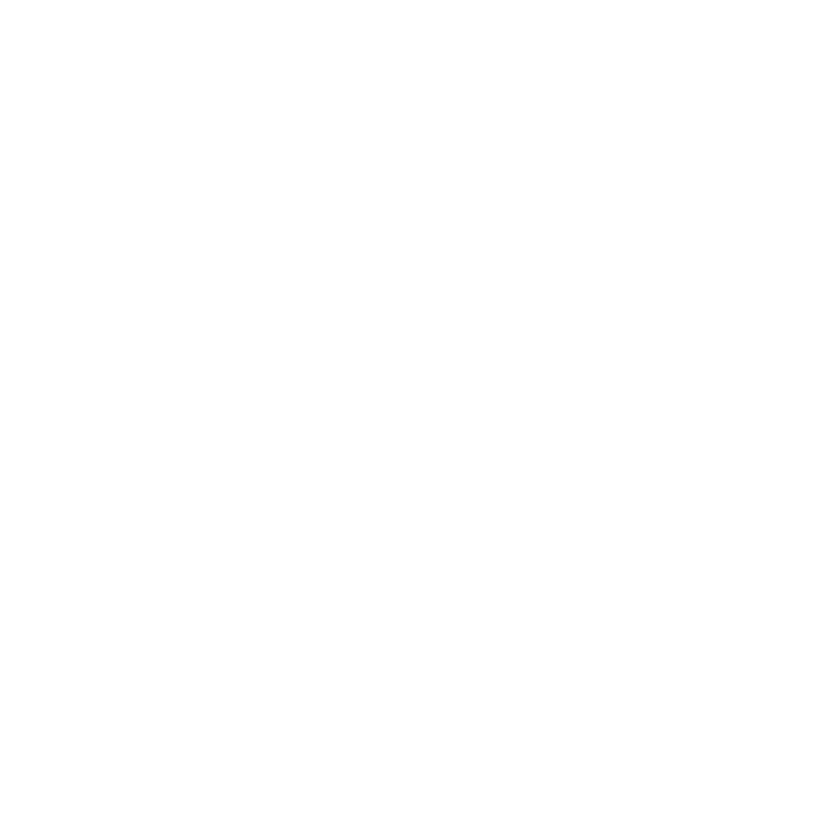

In [114]:
par(mfrow=c(2,2))
hist(anova$residuals)
plot(anova)

The model is adequate and there is insufficient evidence to question linear model assumption and error normality, independence and constant variance assumptions.

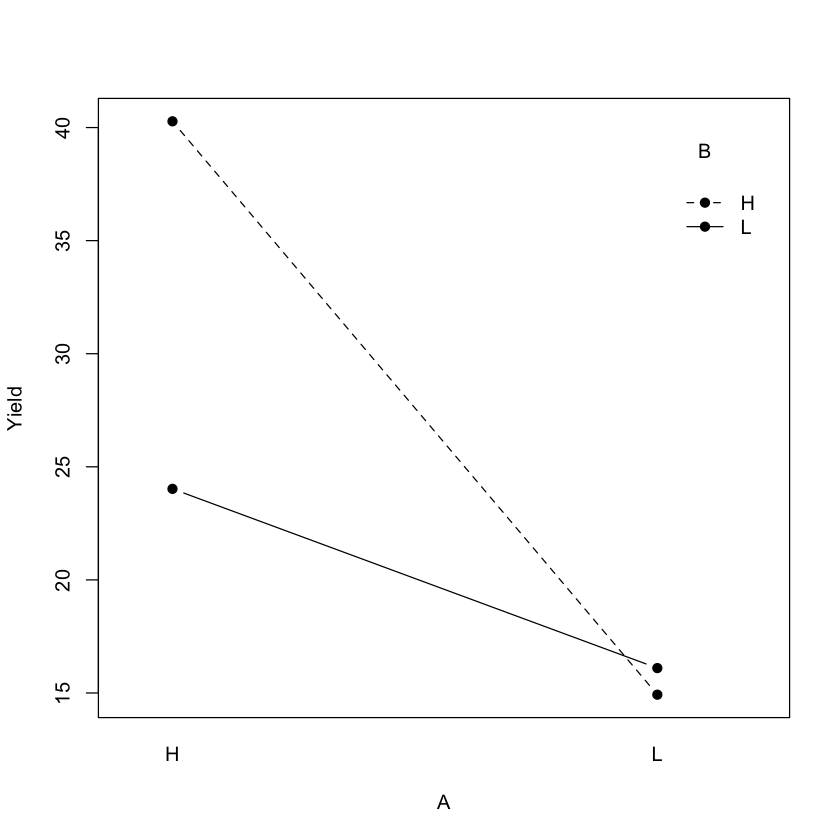

In [115]:
with(dataset, interaction.plot(A, B, Y, type="b", pch=19, fixed=T, xlab="A",ylab="Yield"))

I would choose the lowest **A** because regardless of **B**, it produces the lowest vibration levels (both levels are almost equally small).

## Question 4

An industrial engineer employed by a beverage bottler is interested in the effects of `2` different types of 32-ounce bottles on the time to deliver 12-bottle cases of the product. The `2` bottle types are `glass` and `plastic`. `2` workers are used to perform a task consisting of moving 40 cases of the product 50 feet on a standard type of hand truck and stacking the cases in a display. `4` replicates of a $2^2$ factorial design are performed, and the times observed are listed in the following table. 

Analyse the data and draw the appropriate conclusions.

## Question 5

Analyse the residuals and comment on the model’s adequacy.

In [116]:
dataset <- read.csv('bottle.csv')
anova <- aov(Y ~ Bottle * Worker, data=dataset)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
Bottle         1 2.5361  2.5361  20.409 0.000705 ***
Worker         1 2.0235  2.0235  16.284 0.001653 ** 
Bottle:Worker  1 0.2998  0.2998   2.412 0.146348    
Residuals     12 1.4911  0.1243                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

There is evidence that the bottle type and worker significantly affects the yield. There is no significant interaction between the bottle type and worker.

hat values (leverages) are all = 0.25
 and there are no factor predictors; no plot no. 5



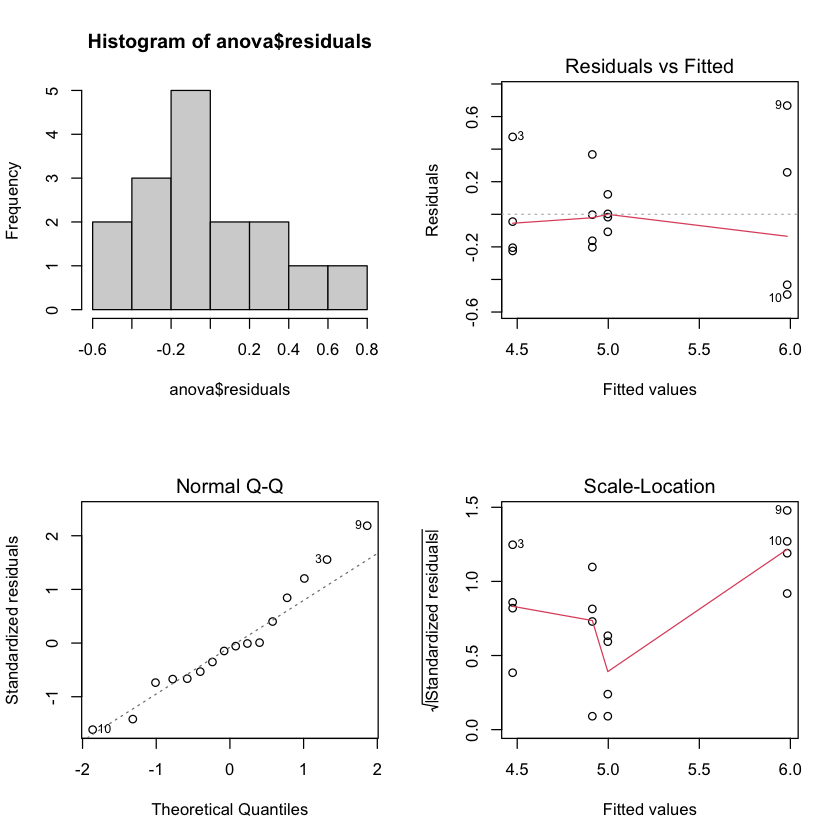

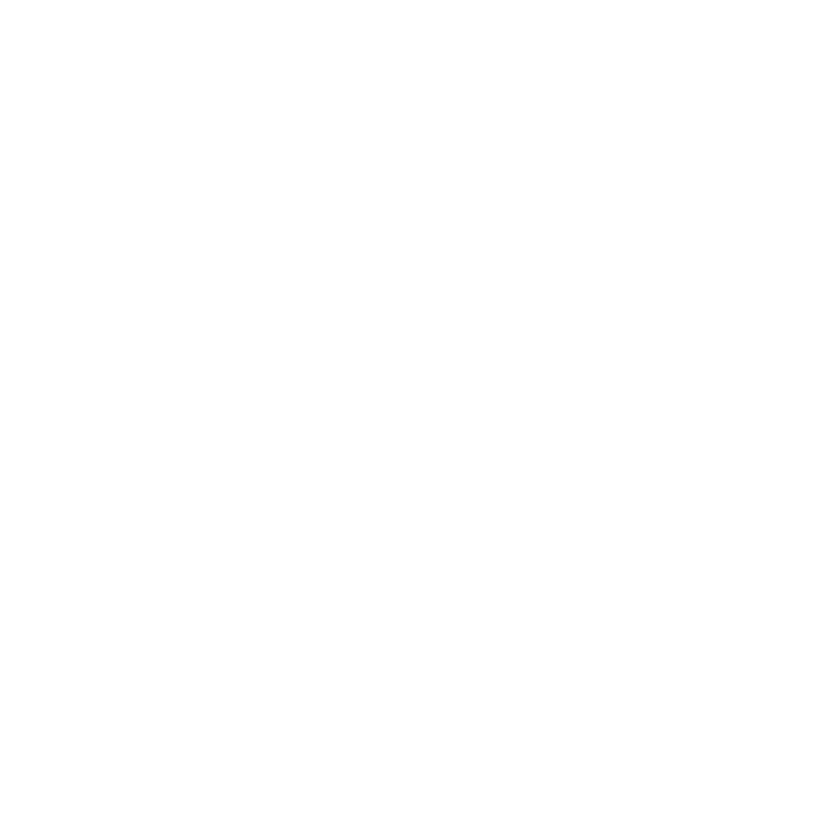

In [111]:
par(mfrow=c(2,2))
hist(anova$residuals)
plot(anova)

The model is inadequate as there are some outliers. There are some indication of non-constant variance in this experiment. Variance seems to be high at high fitted values and low at middle fitted values.

Question: What does it mean by "Variance seems to be high at high fitted values and low at middle fitted values."?
Question: In comparison to L4 Question 3?